In [1]:
from tensorflow import keras

In [2]:
# Fashion MNIST 데이터 가져오기
(train_data, train_target), (test_data, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_data.shape, train_target.shape  # (60000, 28, 28), (60000,)

((60000, 28, 28), (60000,))

In [4]:
test_data.shape, test_target.shape  # (10000, 28, 28), (10000,)

((10000, 28, 28), (10000,))

In [5]:
# 0~1 사이의 값으로 정규화하기
train_scaled = train_data / 255.0
test_scaled = test_data / 255.0

In [6]:
from sklearn.model_selection import train_test_split

# 검증 데이터 만들기
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size=0.2, random_state=0)

In [7]:
train_scaled.shape, val_scaled.shape  # (48000, 28, 28), (12000, 28, 28)

((48000, 28, 28), (12000, 28, 28))

In [8]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), batch_size=256)

Epoch 1/20
188/188 [==============================] - 2s 5ms/step - loss: 0.5911 - accuracy: 0.7946 - val_loss: 0.4597 - val_accuracy: 0.8408
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.4179 - accuracy: 0.8553 - val_loss: 0.4005 - val_accuracy: 0.8602
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 0.3777 - accuracy: 0.8666 - val_loss: 0.3894 - val_accuracy: 0.8633
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 0.3478 - accuracy: 0.8767 - val_loss: 0.3447 - val_accuracy: 0.8781
Epoch 5/20
188/188 [==============================] - 1s 7ms/step - loss: 0.3254 - accuracy: 0.8840 - val_loss: 0.3456 - val_accuracy: 0.8767
Epoch 6/20
188/188 [==============================] - 1s 7ms/step - loss: 0.3079 - accuracy: 0.8896 - val_loss: 0.3320 - val_accuracy: 0.8821
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 0.2935 - accuracy: 0.8936 - val_loss: 0.3412 - val_accuracy: 0.8789
Epoch 

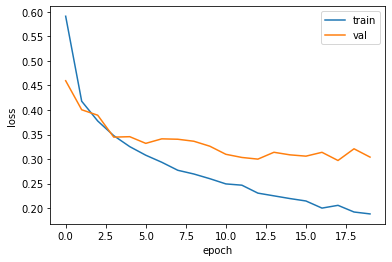

In [12]:
# loss값 시각화하기
import matplotlib.pyplot as plt

def make_plot():
  plt.plot(history.history['loss'])  # 학습 세트 loss값
  plt.plot(history.history['val_loss'])  # 검증 세트 loss값
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()  # 훈련세트는 꾸준히 감소하지만 검증세트는 감소하지 않음 -> 과대적합

In [13]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8853


[0.3295063078403473, 0.8852999806404114]

In [14]:
# 과대적합을 막기 위해 드롭아웃 적용
def make_model():
  model = models.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(300, activation='relu'))
  model.add(layers.Dropout(0.3))  # 30%의 노드를 랜덤하게 끔 (0으로 만듦)
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [15]:
model = make_model()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 드롭아웃 적용한 모델 학습하기
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), batch_size=256)

Epoch 1/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6386 - accuracy: 0.7774 - val_loss: 0.4652 - val_accuracy: 0.8376
Epoch 2/20
188/188 [==============================] - 1s 3ms/step - loss: 0.4441 - accuracy: 0.8439 - val_loss: 0.3988 - val_accuracy: 0.8582
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3949 - accuracy: 0.8598 - val_loss: 0.3809 - val_accuracy: 0.8604
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3715 - accuracy: 0.8672 - val_loss: 0.3563 - val_accuracy: 0.8723
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3500 - accuracy: 0.8742 - val_loss: 0.3425 - val_accuracy: 0.8764
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8785 - val_loss: 0.3384 - val_accuracy: 0.8802
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3185 - accuracy: 0.8828 - val_loss: 0.3280 - val_accuracy: 0.8796
Epoch 

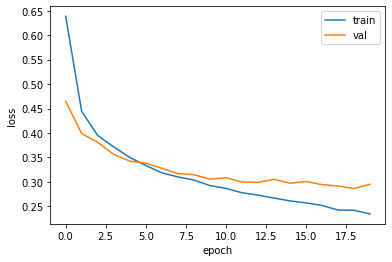

In [18]:
# 드롭아웃 후 loss값 시각화하기
make_plot()

In [19]:
# 에포크 12까지 검증 loss가 줄어들다가 다시 증가함
# 에포크 횟수를 12로 다시 훈련하기
history = model.fit(train_scaled, train_target, epochs=12, validation_data=(val_scaled, val_target), batch_size=256)

Epoch 1/12
188/188 [==============================] - 1s 4ms/step - loss: 0.2324 - accuracy: 0.9127 - val_loss: 0.2907 - val_accuracy: 0.8962
Epoch 2/12
188/188 [==============================] - 1s 3ms/step - loss: 0.2291 - accuracy: 0.9151 - val_loss: 0.2926 - val_accuracy: 0.8962
Epoch 3/12
188/188 [==============================] - 1s 4ms/step - loss: 0.2229 - accuracy: 0.9170 - val_loss: 0.2980 - val_accuracy: 0.8947
Epoch 4/12
188/188 [==============================] - 1s 4ms/step - loss: 0.2200 - accuracy: 0.9172 - val_loss: 0.2928 - val_accuracy: 0.8980
Epoch 5/12
188/188 [==============================] - 1s 4ms/step - loss: 0.2174 - accuracy: 0.9182 - val_loss: 0.2913 - val_accuracy: 0.8955
Epoch 6/12
188/188 [==============================] - 1s 4ms/step - loss: 0.2122 - accuracy: 0.9215 - val_loss: 0.2914 - val_accuracy: 0.8978
Epoch 7/12
188/188 [==============================] - 1s 3ms/step - loss: 0.2100 - accuracy: 0.9206 - val_loss: 0.2917 - val_accuracy: 0.8980
Epoch 

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8948


[0.3216043710708618, 0.8948000073432922]

In [21]:
# 모델 저장하기 (모델 구조 + 모델 파라미터 모두 저장)
model.save('fashion_mnist.h5')

In [22]:
# 모델 불러오기
model2 = models.load_model('fashion_mnist.h5')
model2

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 불러온 모델로 평가하기
model2.evaluate(test_scaled, test_target)  # 위 평가결과와 같게 나오는지 확인

313/313 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8948


[0.3216043710708618, 0.8948000073432922]

In [25]:
# 콜백 사용하기: 훈련 과정 중간에 어떤 작업을 수행할 수 있도록 하는 기능
model = make_model()

In [26]:
# ModelCheckpoint 콜백: 훈련하는 동안에 모델의 체크포인트를 저장
# save_best_only=True를 지정하면 최상의 검증 점수를 만드는 모델을 'best-model.h5'에 저장함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

In [27]:
# 콜백 설정하기 (콜백을 설정해도 에포크 20번까지 수행함)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb], batch_size=256)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6384 - accuracy: 0.7771 - val_loss: 0.4484 - val_accuracy: 0.8451
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.4441 - accuracy: 0.8437 - val_loss: 0.4093 - val_accuracy: 0.8562
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3982 - accuracy: 0.8588 - val_loss: 0.3748 - val_accuracy: 0.8668
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8674 - val_loss: 0.3589 - val_accuracy: 0.8707
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.8727 - val_loss: 0.3393 - val_accuracy: 0.8792
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8773 - val_loss: 0.3299 - val_accuracy: 0.8795
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3199 - accuracy: 0.8830 - val_loss: 0.3355 - val_accuracy: 0.8773
Epoch 

In [28]:
model3 = keras.models.load_model('best-model.h5')
model3.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.8889


[0.3133910000324249, 0.8888999819755554]

In [29]:
# 조기종료(Early Stopping): 일정 에포크동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤
model = make_model()

In [30]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [31]:
# 몇 번째 에포크에서 훈련이 중지되었는지 확인하기 (N에서 중지되었으면 N-2에서 가장 낮은 손실을 냄)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb], batch_size=256)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6415 - accuracy: 0.7788 - val_loss: 0.4471 - val_accuracy: 0.8470
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.4434 - accuracy: 0.8439 - val_loss: 0.4040 - val_accuracy: 0.8565
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3986 - accuracy: 0.8568 - val_loss: 0.3764 - val_accuracy: 0.8642
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8670 - val_loss: 0.3599 - val_accuracy: 0.8713
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3507 - accuracy: 0.8742 - val_loss: 0.3427 - val_accuracy: 0.8773
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 0.8791 - val_loss: 0.3323 - val_accuracy: 0.8798
Epoch 7/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8820 - val_loss: 0.3254 - val_accuracy: 0.8846
Epoch 

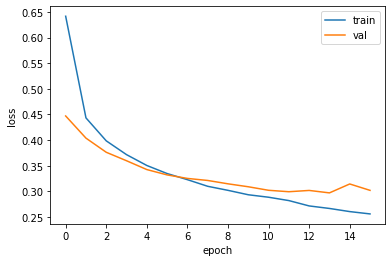

In [32]:
# 위에서 N이 나왔다면 그래프는 0부터 시작하므로 N-1이 가장 낮은 손실을 냄
make_plot()

In [33]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8864


[0.3207005262374878, 0.8863999843597412]